<h1>This task is to understand boston dataset using <b>Ridge Regression</b> model</h1>



In [1]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing boston dataset from sklearn

from sklearn.datasets import load_boston

In [3]:
# Initial data load

boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dataset['PRICE'] = boston.target

In [6]:
# Boston dataset preview

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Boston dataset insights

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# Statistical information on boston dataset

dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Identifying the missing values

dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
# Identifying the correlation

dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


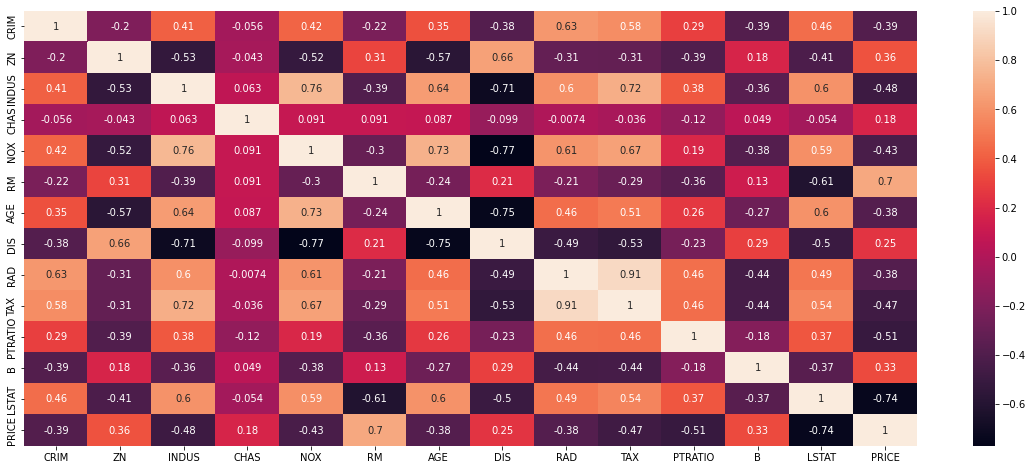

In [11]:
# heatmap of correlation matrix

plt.subplots(figsize=(20, 8))
sns.heatmap(dataset.corr(), annot=True)

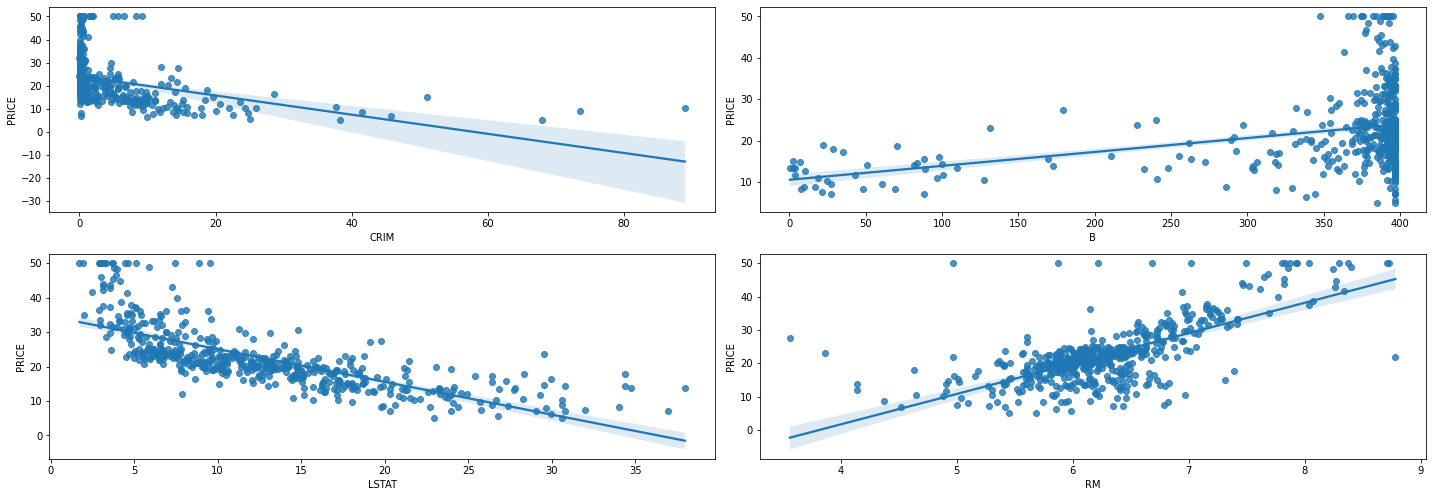

In [12]:
# Plotting scatter plot

features = ['CRIM', 'B', 'LSTAT', 'RM']
plt.subplots(figsize=(20, 10))
for index, feature in enumerate(features):
  plt.subplot( len(features)-1, 2, index + 1)
  sns.regplot(x=dataset[feature], y=dataset['PRICE'])
  plt.xlabel(feature)
  plt.tight_layout()


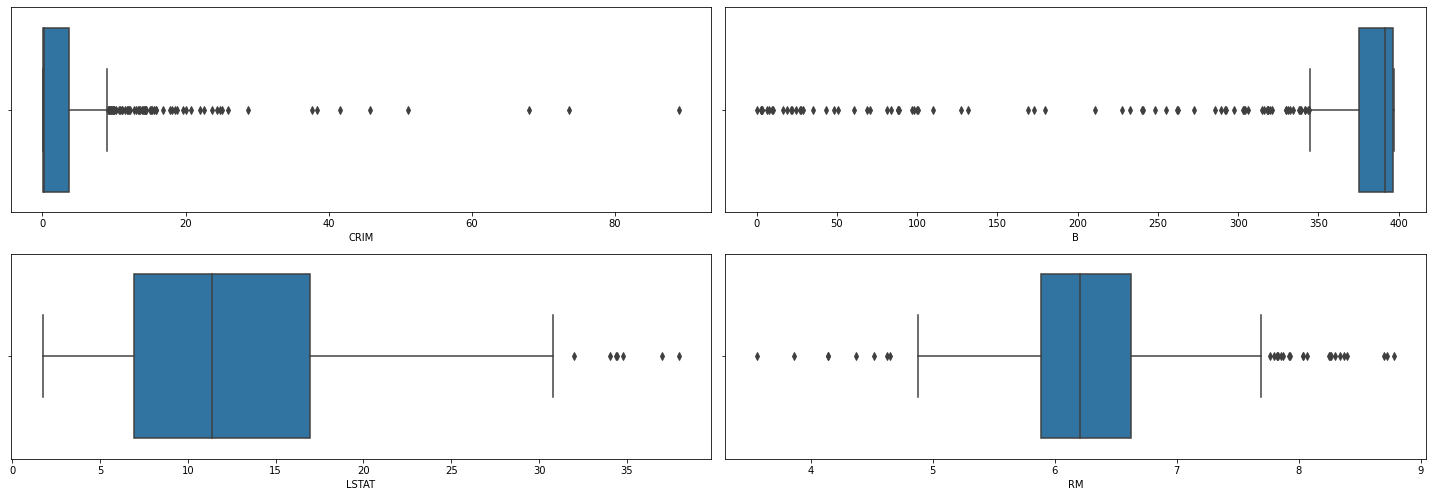

In [13]:
# Plotting box plot identifying the outliers

features = ['CRIM', 'B', 'LSTAT', 'RM']
plt.subplots(figsize=(20, 10))
for index, feature in enumerate(features):
  plt.subplot( len(features)-1, 2, index + 1)
  sns.boxplot(x=dataset[feature])
  plt.xlabel(feature)
  plt.tight_layout()


In [14]:
# Identifying independent and dependent feature

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [15]:
# Creating training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Data analysis on X_train and y_train

print(type(X_train), len(X_train), type(y_train), len(y_train))

<class 'pandas.core.frame.DataFrame'> 379 <class 'pandas.core.series.Series'> 379


In [17]:
# Data analysis on X_test and y_test

print(type(X_test), len(X_test), type(y_test), len(y_test))

<class 'pandas.core.frame.DataFrame'> 127 <class 'pandas.core.series.Series'> 127


In [18]:
## Standardizing the datasets

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

<ul>
<li>Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.</li>
<li>The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.</li>
<li>In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.</li>
</ul>

<p>
  If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. 
  Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.
</p>

In [19]:
# Calculate mean and standard deviation
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
## Model training

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge = Ridge()

In [24]:
ridge.fit(X_train, y_train)

Ridge()

In [25]:
print(ridge.coef_)

[-1.05413713  0.66437555  0.3128819   0.74118349 -1.89877304  3.14706658
 -0.25666106 -2.91851804  2.1356466  -1.58202618 -2.07557365  1.14929024
 -3.68300256]


In [26]:
print(ridge.intercept_)

22.90791556728232


In [27]:
ridge_prediction = ridge.predict(X_test)

In [28]:
ridge_prediction

array([28.8144015 , 35.95839941, 15.19463903, 25.22029526, 18.87141653,
       23.21892789, 17.61376371, 14.34176358, 23.00010879, 20.64252129,
       24.75524201, 18.70329794, -6.91846774, 21.85797935, 19.21523031,
       26.25107607, 20.45142962,  5.65740607, 40.36436266, 17.63815082,
       27.28535855, 29.99166109, 11.20207586, 24.12779624, 17.87695323,
       15.75164134, 22.9527327 , 14.27850883, 22.27045224, 19.27466799,
       22.24679174, 25.24445138, 25.67458597, 17.97074806, 16.66842175,
       17.1631469 , 31.19887033, 20.18295151, 23.7254789 , 24.78676865,
       13.98051919, 31.92186716, 42.43866761, 17.48696408, 27.15644245,
       17.05369507, 13.92961591, 26.05870944, 20.33263608, 30.00465855,
       21.37523786, 34.26921424, 15.92798339, 26.2019942 , 39.46048517,
       22.81440305, 18.94282088, 32.6139769 , 25.02429202, 12.94842409,
       22.77932086, 30.51296138, 31.56269033, 15.94928638, 20.62417373,
       16.51632738, 20.48349555, 25.99798451, 30.59185414, 11.43

In [29]:
# Assumptions

Text(0, 0.5, 'Test prediction data')

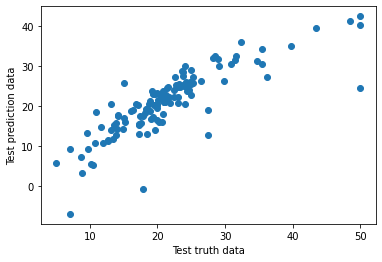

In [30]:
plt.scatter(y_test, ridge_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test prediction data')

In [31]:
residuals = y_test - ridge_prediction

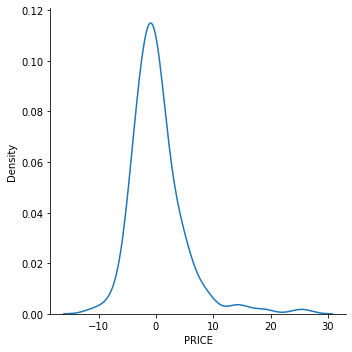

In [32]:
sns.displot(residuals, kind="kde")

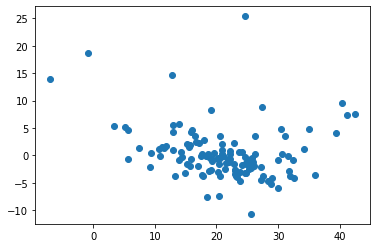

In [33]:
plt.scatter(ridge_prediction, residuals)

In [34]:
# Cost function analysis

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
MSE = mean_squared_error(y_test, ridge_prediction)
MAE = mean_absolute_error(y_test, ridge_prediction)

print("Mean Squared Error", MSE)
print("Mean Absolute Error", MAE)
print("Root Mean Squared Error", np.sqrt(MAE))

Mean Squared Error 22.116880575204675
Mean Absolute Error 3.0589286010846246
Root Mean Squared Error 1.7489793026461533


In [37]:
# Performance metrics

In [38]:
from sklearn.metrics import r2_score

In [39]:
score = r2_score(y_test, ridge_prediction)
adj_score = 1 - ((1-score) * (len(y_test) - 1 ))/( len(y_test) - X_test.shape[1] - 1)

In [40]:
print('R Squared', score)
print('Adjusted R Squared', adj_score)

R Squared 0.6841670326524791
Adjusted R Squared 0.6478322664974546
